Also find at google colab, where the project was first created: https://colab.research.google.com/drive/11jrW8mpE_oWFh1Lz_5I9Ok7CE53QOsJ7?usp=sharing

In [1]:
import warnings
#warnings.filterwarnings("ignore")                    # just ignore warnings

# data handling
import numpy as np                                   # linear algebra
import pandas as pd                                  # data processing

# ML learning
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split # split data into training and test sets

# data visualization
import matplotlib.pyplot as plt                     # basic plotting library
import seaborn as sns                               # more advanced visual plotting library 
%matplotlib inline

import scipy

### Import of datasets 

In [2]:
DataFrame1 = pd.read_fwf("o-ring-erosion-only.data", 
                  sep='\t', header=None, 
                  names=["O-rings at risk", "O-rings at thermal distress", "Launch temperature", "Leak-check pressure", "Temporal order of flight"])

DataFrame2 = pd.read_fwf("o-ring-erosion-or-blowby.data", 
                  sep='\t', header=None, 
                  names=["O-rings at risk", "O-rings at thermal distress", "Launch temperature", "Leak-check pressure", "Temporal order of flight"])


### Inspection of datasets

In [3]:
DataFrame1.head(23)

,O-rings at risk,O-rings at thermal distress,Launch temperature,Leak-check pressure,Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


In [4]:
DataFrame2.head(23)

,O-rings at risk,O-rings at thermal distress,Launch temperature,Leak-check pressure,Temporal order of flight
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


### Visualization of erosion-only dataset


In [5]:
X1 = DataFrame1.iloc[:,2]
X2 = DataFrame1.iloc[:,3]

Y = DataFrame1.iloc[:,1]

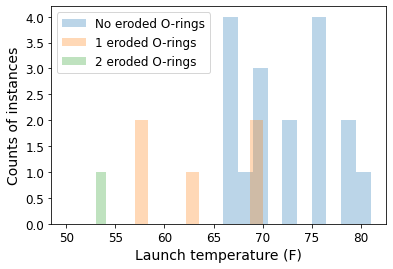

In [6]:
plt.hist(X1[Y==0], alpha = 0.3, label = 'No eroded O-rings')
plt.hist(X1[Y==1], alpha = 0.3, label = '1 eroded O-rings')
plt.hist(X1[Y==2], alpha = 0.3, label = '2 eroded O-rings', bins=range(50, 65, 1))                                                                                                                            
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Launch temperature (F)', fontsize = 14)
plt.ylabel('Counts of instances', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Erosion_temp_hist.png", dpi = 1200)
plt.show()

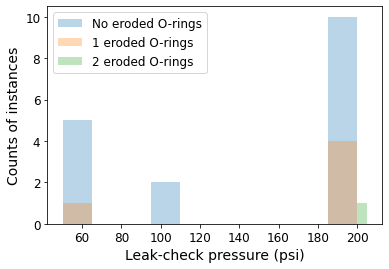

In [7]:
plt.hist(X2[Y==0], alpha = 0.3, label = 'No eroded O-rings')
plt.hist(X2[Y==1], alpha = 0.3, label = '1 eroded O-rings')
plt.hist(X2[Y==2], alpha = 0.3, label = '2 eroded O-rings', bins=range(200, 210, 5))                                                                 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Leak-check pressure (psi)', fontsize = 14)
plt.ylabel('Counts of instances', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Erosion_press_hist.png", dpi = 1200)
plt.show()

### Fitting of erosion-only dataset

In [8]:
#Determine fraction of O-rings that have suffered erosion only
erosion_frac = DataFrame1["O-rings at thermal distress"].values/6

In [9]:
DataFrame1.drop(["O-rings at thermal distress"],axis=1,inplace=True)
DataFrame1.drop(["Temporal order of flight"],axis=1,inplace=True)
DataFrame1.drop(["O-rings at risk"],axis=1,inplace=True)

In [10]:
features = DataFrame1.values

In [11]:
#Perform linear regression on the erosion-only dataset with temperature and pressure
erosion_model = LinearRegression()

erosion_model.fit(features, erosion_frac)

y_pred_erosion = erosion_model.predict(features)

train_accuracy = erosion_model.score(features, erosion_frac)

print('Train accuracy: ', train_accuracy)

Train accuracy:  0.5888076515117159


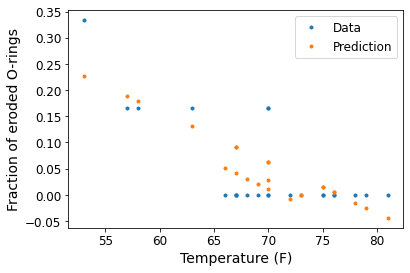

In [12]:
plt.plot(features[:,0], erosion_frac, ".", label = 'Data')
plt.plot(features[:,0], y_pred_erosion, ".", label = 'Prediction')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Temperature (F)', fontsize = 14)
plt.ylabel('Fraction of eroded O-rings', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Fraction_with_erosion_pred.png", dpi = 1200, bbox_inches = 'tight')
plt.show()

### Extraction of blowby-only dataset


In [13]:
blowby_frac = DataFrame2["O-rings at thermal distress"].values.astype(float)

In [14]:
# Determine fraction of O-rings that have suffered blowby only
for i in range(0, 23):
    blowby_frac[i] = (blowby_frac[i] - erosion_frac[i] * 6)/(6 - erosion_frac[i] * 6)

### Visualization of blowby-only dataset

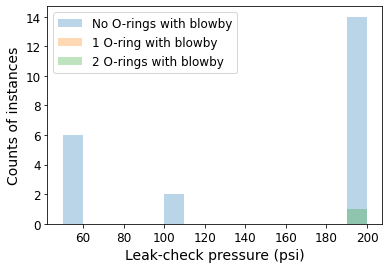

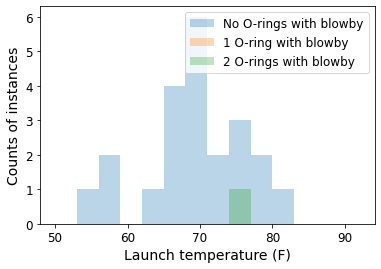

In [15]:
plt.hist(features[blowby_frac == 0, 1], alpha = 0.3, bins = range(50, 200 + 10, 10), label = 'No O-rings with blowby')
plt.hist(features[blowby_frac == 1/6, 1], alpha = 0.3, bins = range(50, 200 + 10, 10), label = '1 O-ring with blowby')
plt.hist(features[blowby_frac == 2/6, 1], alpha = 0.3, bins = range(50, 200 + 10, 10), label = '2 O-rings with blowby')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Leak-check pressure (psi)', fontsize = 14)
plt.ylabel('Counts of instances', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Blowby_press_hist.png", dpi = 1200)
plt.show()

plt.hist(features[blowby_frac == 0, 0], alpha = 0.3, bins = range(50, 90 + 3, 3), label = 'No O-rings with blowby')
plt.hist(features[blowby_frac == 1/6, 0], alpha = 0.3, bins = range(50, 90 + 3, 3), label = '1 O-ring with blowby')
plt.hist(features[blowby_frac == 2/6, 0], alpha = 0.3, bins = range(50, 90 + 3, 3), label = '2 O-rings with blowby')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Launch temperature (F)', fontsize = 14)
plt.ylabel('Counts of instances', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Blowby_temp_hist.png", dpi = 1200)
plt.show()

### Fitting of blowby-only dataset


In [16]:
#Perform linear regression on the blowby-only dataset with pressure

blowby_model = LinearRegression()

blowby_model.fit(features[:, 1].reshape(-1, 1), blowby_frac)

y_pred_blowby = blowby_model.predict(features[:, 1].reshape(-1, 1))

train_accuracy = blowby_model.score(features[:, 1].reshape(-1, 1), blowby_frac)

print('Train accuracy: ', train_accuracy)

Train accuracy:  0.023354564755838636


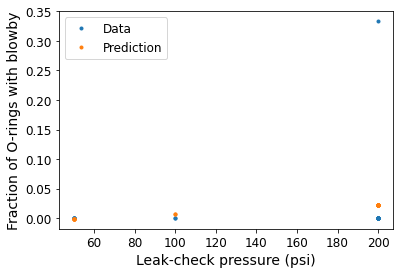

In [17]:
plt.plot(features[:,1], blowby_frac, ".", label = 'Data')
plt.plot(features[:,1], y_pred_blowby, ".", label = 'Prediction')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Leak-check pressure (psi)', fontsize = 14)
plt.ylabel('Fraction of O-rings with blowby', fontsize = 14)
plt.legend(fontsize = 12)
#plt.savefig("Fraction_with_blowby_pred.png", dpi = 1200, bbox_inches = 'tight')
plt.show()

### Calculation of O-ring failure probability

In [18]:
# Probability of a number of O-rings suffering from erosion only at 31 F and 200 psi
erosion_fail_prob = erosion_model.predict([[31, 200]])
# Probability of a number of O-rings suffering from blowby only at 200 psi
blowby_fail_prob = blowby_model.predict([[200]])

# Probability of a number of O-rings failing because of erosion and blowby combined at 31 F and 200 psi
failure_prob = erosion_fail_prob * blowby_fail_prob

In [19]:
failed_orings = [scipy.stats.binom.pmf(k, 12, failure_prob) for k in range(0, 13)]

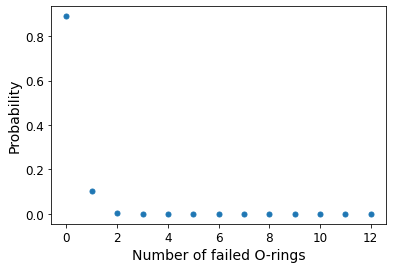

In [20]:
# Plot probability of certain number of O-rings failing at 31 F and 200 psi
plt.plot(range(0, 13), failed_orings, '.', markersize = 10)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Number of failed O-rings', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
#plt.savefig("Failed_Orings.png", dpi = 1200)
plt.show()

In [21]:
for i in range(0, 13):
    print("The probability for", i, "O-rings to fail is: ", failed_orings[i][0])

The probability for 0 O-rings to fail is:  0.8897845761027527
The probability for 1 O-rings to fail is:  0.10441260260857887
The probability for 2 O-rings to fail is:  0.005615680780084818
The probability for 3 O-rings to fail is:  0.00018304925253675498
The probability for 4 O-rings to fail is:  4.027516050562801e-06
The probability for 5 O-rings to fail is:  6.301501796895268e-08
The probability for 6 O-rings to fail is:  7.189151834537583e-10
The probability for 7 O-rings to fail is:  6.025841003320643e-12
The probability for 8 O-rings to fail is:  3.6828538741294105e-14
The probability for 9 O-rings to fail is:  1.6006219614007212e-16
The probability for 10 O-rings to fail is:  4.695661997039337e-19
The probability for 11 O-rings to fail is:  8.348740079627614e-22
The probability for 12 O-rings to fail is:  6.803407685757067e-25
